# Оглавление

- [1. Введение](#1.)
- [1.1. План работ](#1.1.)
- [1.2. Описание этапа обработки](#1.2.)
- [1.3. Описание данных](#1.3.)
- [1.4. Данные](#1.4.)
- [1.5. Тезисы по результату встречи в Zoom 13.09.2022](#1.5.)
- [2. Ознакомление с данными](#2.)
- [2.1. Данные об электродах](#2.1.)
- [2.2. Данные о подаче сыпучих материалов (объем)](#2.2.)
- [2.3. Данные о продувке сплава газом](#2.3.)
- [2.4. Результаты измерения температуры (целевой признак)](#2.4.)
- [2.5. Данные о проволочных материалах (объём)](#2.5.)
- [3. Предобработка данных](#3.)
- [3.1. Данные об электродах](#3.1.)
- [3.2. Данные о подаче сыпучих материалов (объем)](#3.2.)
- [3.3. Данные о продувке сплава газом](#3.3.)
- [3.4. Результаты измерения температуры (целевой признак)](#3.4.)
- [3.5. Данные о проволочных материалах (объём)](#3.5.)
- [4. Анализ данных](#4.)
- [4.1. Данные об электродах](#4.1.)
- [4.2. Данные о подаче сыпучих материалов (объем)](#4.2.)
- [4.3. Данные о продувке сплава газом](#4.3.)
- [4.4. Результаты измерения температуры (целевой признак)](#4.4.)
- [4.5. Данные о проволочных материалах (объём)](#4.5.)
- [5. Подытог по проделанному](#5.)
- [5.1. Чек-лист по разделу 3](#5.1.)
- [5.2. Дальнейший план работ](#5.2. )
- [6. Подготовка и финальная проверка датасета](#6.)
- [6.1. Объединение датасетов](#6.1.)
- [6.2. Проверка на мультиколлинеарность](#6.2.)
- [6.3. Разделение на тренировочную и тестовую выборку](#6.3.)
- [7. Машинное обучение](#7.)
- [7.1. LightGBM](#7.1.)
- [7.2. RandomForest](#7.2.)
- [7.2.1. Важность параметров](#7.2.1.)
- [7.2. ElasticNet](#7.2.)
- [8. Итоговый результат и выводы](#)
- [8.1. Итоговый рейтинг](#8.)
- [8.2. Выводы](#8.2.)

# 1. Введение<a id="1."></a> 

**Задача:** Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

## 1.1. План работ<a id="1.1."></a>
- **Часть 1: первичный анализ данных.**

1. разобраться с производственным процессом и с исходными данными
2. провести их первичный анализ по стандартной схеме (особенности, аномалии, адекватность). 
3. составить детальный план самой работы по дальнейшему моделированию (основные шаги, которые собираетесь сделать).

- **Часть 2: построение самой модели.**

Требования к данной части:
- RANDOM_STATE = 12092022 (дата начала дипломной работы)
- тестовая выборка - 20%
- Обязательно используем подбор параметров только с использованием GridSearchCV или RandomizedSearchCV.
- Ищем лучшую модель на трайне (подбор моделей).
- А на тесте проверяем ТОЛЬКО лучшую модель!!!
- Метрика.
    - MAE > 8.7 — 0 sp
    - 7.6 < MAE ≤ 8.7 — 4 sp
    - 6.8 < MAE ≤ 7.6 — 4.5 sp
    - 6.3 < MAE ≤ 6.8 — 5 sp
    - 6.0 < MAE ≤ 6.3 — 5.5 sp
    - MAE ≤ 6.0 — 6 sp
    
    
- **Часть 3: отчёт о проделанной работе.**

ЦЕЛЬ отчёта: «Взяв отчёт в руки – каждый сможет понять и реализовать полученную модель без доп.исследований. Примеры можно глянуть здесь: http://cs229.stanford.edu/projects2014.html
Так же необходимо ответить на вопросы:
- Какие пункты плана были выполнены, а какие — нет (поясните почему)?
- Какие трудности возникли и как вы их преодолели?
- Какие ключевые шаги в решении задачи выделили?
- Какая ваша итоговая модель и какое у неё качество?

## 1.2. Описание этапа обработки<a id="1.2."></a>

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## 1.3. Описание данных<a id="1.3."></a>

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## 1.4. Данные<a id="1.4."></a>

[final_steel.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/f3fbea3a-263d-4e1c-babd-0bf07920c911/final_steel.zip)

Данные также находятся в тренажёре, в папке `/datasets/final_steel/`.

## 1.5. Тезисы по результату встречи в Zoom 13.09.2022<a id="1.5."></a>
- у всех партий масса ковша одинаковая и равна 100 т.
- 'data_bulk.csv' - содерижит даныне о присадках по каждой итерации. Информация о каждом виде присадок содержится в отдельном столбце bulk_1, bulk_2 и т.п. Особености обработки таблицы 'data_bulk.csv'
    - Если есть пропуски в значениях присадок, значит их не было, в этом случае пропуски необходимо заполнить значением "0"
    - Присадки необходимо считать суммарно по партии,
- 'data_gas.csv' содержит информацию какой объем газа был затрачен на партию
- процесс происходит в несколько итерраций. как только достигается необходимое значение химсостава - **конец нашей задачи** (!!! требуется перевормулировать или удалить)
- нормальная темеперутура сплава = 1400 С. Если значение 1600 - это перерасход энергии и уменьшение ресурса оборудования. Если 1200 - вероятно ошибка в данных
- целевой признак находится в data_temp. Особености его обработки:
    - в предоставленных данных есть партии содной итерацией (одна запись в таблице data_temp), такие партии необходимо целиком исключить из рассмотрения
    - есть данных в которых отсутствует последнее значение температуры - такие партии так же необходимо исключить из рассмотрения
    - если значения первой и последней температуры совпадают, то, в целях предотвращения утечки целевого признака, неоходимо так же исключитьб такие партии из рассмотрения
    - при расмотрении имеют смысл только первая и последняя записи (партии)
- таблица 'data_arc.csv' содержит энергетические характеристики процесса подогрева сплава.  Особености обработки таблицы 'data_arc.csv'
    - суммирование некоторых физических величин не имеет физического смысла, например суммировать можно произведенную работу, а не можности, но в рамках данного проекта подобные операции допустимы
    - возможно есть смысл оценить мультиколлинеарность параметров и отбросить лишние
    
- 'data_wire_time.csv' - не несет значимой информации
- 'data_bulk_time.csv' - не несет значимой информации

- общее
    - в данных возможны проспуски в столбце Key, в связи с чем необходимо использовать только Inner join
    - к вопросу оценки выбросов необходимо подойти с пониманием сути процесса, а не формально. Так можщность 715 Вт - можно считать как "супервыброс", а то что меньше, возможно имеет технологический смысл и выбрасывать из выборки уже не стоит.
    - по результатам моделирования необходимо определить наиболее значимые параметры в исходном датасете
    - поиск лучшей модели необъходимо найти серез grid_search / random_search (или аналоги), и лучшую можель  
    

# 2. Ознакомление с данными<a id="2."></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 

import optuna

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

from lightgbm import LGBMRegressor

In [3]:
try:
    df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv') 
    df_bulk= pd.read_csv('/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
except FileNotFoundError:
    df_arc = pd.read_csv('datasets/final_steel/data_arc.csv') 
    df_bulk= pd.read_csv('datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('datasets/final_steel/data_wire_time.csv')

## 2.1. Данные об электродах<a id="2.1."></a>

In [4]:
display(df_arc.head())
print(df_arc.info())

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


In [5]:
print('Всего строк с пропусками значений по каждому столбцу:\n' ,df_arc.isna().sum())

Всего строк с пропусками значений по каждому столбцу:
 key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64


**Выводы:**
    
1. Даже глядя на первые 5 строк видно, что по каждой партии может быть не одна запись.
2. Пропусков в столбце key нет

**Планируемые действия**

1. Переименование столбцов
    1. "Начало нагрева дугой" -> "arc_start_time"
    2. "Конец нагрева дугой" -> "arc_end_time"
    3. "Активаная мощность" -> "arc_active_power"
2. Удалить столбец "Реактивная мощность", т.к. на нагрев она не влияет
3. Просуммировать произведенную активную работу по каждой партии (по ключу). Для этого необходимо посчитать время нагрева в часах и умножить его на активную мощность
4. Замены пропусков не требуется

## 2.2. Данные о подаче сыпучих материалов (объем)<a id="2.2."></a>

In [6]:
display(df_bulk.head())
print(df_bulk.info())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


In [7]:
print('Количество записей равно количеству уникальных значений в столбце key:', len(df_bulk['key']) == len(df_bulk['key'].unique()))
print('Доверяй, но проверяй. Пропусков в столбце key:', df_bulk['key'].isna().sum())

Количество записей равно количеству уникальных значений в столбце key: True
Доверяй, но проверяй. Пропусков в столбце key: 0


**Выводы:**
    
1. На каждую партию только по одной записи. Агрегация строк не требуется
2. Пропусков в столбце key нет

**Планируемые действия**

1. Переименовать столбцы ("Bulk 1" -> "bulk_1" и т.д.)
2. Заполнить пропуски нулями. (если значение отсутствует, значит присадку не дабавляли, значит значение д.б. 0)

## 2.3. Данные о продувке сплава газом<a id="2.3."></a>

In [8]:
display(df_gas.head())
print(df_gas.info())

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


In [9]:
print('Количество записей равно количеству уникальных значений в столбце key:', len(df_gas['key']) == len(df_gas['key'].unique()))
print('Всего строк с пропусками значений по каждому столбцу:\n', df_gas.isna().sum())

Количество записей равно количеству уникальных значений в столбце key: True
Всего строк с пропусками значений по каждому столбцу:
 key      0
Газ 1    0
dtype: int64


**Выводы:**
    
1. По каждой партии только по одной записи. Агрегация строк не требуется
2. Пропусков в столбцах нет

**Планируемые действия**

1. Переименовать столбец ("Газ 1" -> "gas")
2. Суммирования значений по партии (ключу) не требуется
3. Замены пропусков не требуется

## 2.4. Результаты измерения температуры (целевой признак)<a id="2.4."></a>

In [10]:
display(df_temp.head())
print(df_temp.info())

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None


In [11]:
print('В таблице df_gas нет повторяющихся значений партий:', len(df_temp['key']) == len(df_temp['key'].unique()))
print('Всего строк с пропусками значений по каждому столбцу:\n', df_temp.isna().sum())

В таблице df_gas нет повторяющихся значений партий: False
Всего строк с пропусками значений по каждому столбцу:
 key                0
Время замера       0
Температура     2901
dtype: int64


**Выводы:**
    
1. По каждой партии больше чем по одной записи
2. Пропусков в столбце key нет
3. Присутствуют пропуски в столбце "Температура"

**Планируемые действия**

1. Переименовать столбцы ("Температура"->"temp")
2. Исключить партии с одной итерацией. (Значение key встречается только один раз)
3. Исключить записи о партии с пропущенным значением температуры в последней и вероятно первой партии (TBD)
4. Исключить записи, где значение первой и последней температуры в партии совпадают (предотвращаем утечку целевого признака)
5. Исключиить промежуточные записи.  т.е. оставить только первую и последнюю записи о температуре в партии
6. Удалить столбец "Время замера"
7. Пересобрать таблицу из "длинной" в "широкую":  каждое из оставшихся значений должно быть не в разных строках а в разных столбцах
8. Проверить на пропуски

## 2.5. Данные о проволочных материалах (объём)<a id="2.5."></a>

In [11]:
display(df_wire.head())
print(df_wire.info())

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


In [12]:
print('В таблице df_wire нет повторяющихся значений партий:', len(df_wire['key']) == len(df_wire['key'].unique()))
print('Всего строк с пропусками значений по каждому столбцу:\n', df_wire.isna().sum())

В таблице df_wire нет повторяющихся значений партий: True
Всего строк с пропусками значений по каждому столбцу:
 key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


**Выводы:**
    
1. Суммирования значений по партии (ключу) не требуется
2. Пропусков в столбце key нет
3. Присутствуют пропуски в столбцах с данными

**Планируемые действия**

1. Переименовать столбцы "Wire 1"-> "wire_1"  и т.д.
2. Заполнить пропуски нулями.

# 3. Предобработка данных<a id="3."></a>

Подготовим функции для оптимизации работы

In [13]:
# переименование столбцов
def column_renamer(df, old_col_list, new_col_list):
    """
    df - датафрейм в которомнеобходимо переименовать столбцы
    new_col_list - список новых названий столбцов датафрейма
    """
    
    dict_to_rename = {}
    for i in zip(old_col_list, new_col_list):
        dict_to_rename[i[0]] = i[1]
    df.rename(columns=dict_to_rename, inplace = True)
    print('список новых названий столбцов:', df.columns.to_list())

## 3.1. Данные об электродах<a id="3.1."></a>

**Переименуем столбцы**

In [14]:
arc_old_col_list = ['Начало нагрева дугой', 'Конец нагрева дугой', 'Активная мощность']
arc_new_col_list = ['arc_start_time', 'arc_end_time', 'arc_active_power']

column_renamer(df=df_arc, old_col_list=arc_old_col_list, new_col_list=arc_new_col_list)

список новых названий столбцов: ['key', 'arc_start_time', 'arc_end_time', 'arc_active_power', 'Реактивная мощность']


**Удалим лишние столбцы**

In [15]:
df_arc.drop(axis=1, columns=['Реактивная мощность'], inplace=True)

**Просуммируем затраченную на каждой партии работу**

In [16]:
# сперва преобразуем в datetime
df_arc['arc_start_time'] = pd.to_datetime(df_arc['arc_start_time'])
df_arc['arc_end_time'] = pd.to_datetime(df_arc['arc_end_time'])
df_arc['duration'] = df_arc['arc_end_time'] - df_arc['arc_start_time']
df_arc['hours'] = df_arc['duration'].dt.total_seconds() / 3600
df_arc['work'] = df_arc['arc_active_power'] * df_arc['hours']

# проверим результат
df_arc.head(2)

,key,arc_start_time,arc_end_time,arc_active_power,duration,hours,work
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,00:03:48,0.063333,0.061817
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,00:03:05,0.051389,0.041399


**Удалим лишние столбцы**

In [17]:
df_arc.drop(columns=['arc_start_time', 'arc_end_time', 'arc_active_power', 'duration','hours'], inplace=True)

**Просуммируем мощность по каждой партии**

In [18]:
df_arc = df_arc.groupby(by='key')['work'].sum()

In [19]:
df_arc = pd.DataFrame(data=df_arc, columns=['work']).reset_index(drop=False)

In [20]:
# оценим результат
df_arc.info()
print('====== '*5)
display(df_arc.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3214 non-null   int64  
 1   work    3214 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.3 KB
====== ====== ====== ====== ====== 


,key,work
0,1,0.335501
1,2,0.203838
2,3,0.123218


## 3.2. Данные о подаче сыпучих материалов (объем)<a id="3.2."></a>

**Переименуем столбцы**

In [21]:
bulk_old_col_list = ['Bulk 1','Bulk 2','Bulk 3','Bulk 4','Bulk 5','Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11','Bulk 12','Bulk 13','Bulk 14','Bulk 15']
bulk_new_col_list = ['bulk_1','bulk_2','bulk_3','bulk_4','bulk_5','bulk_6','bulk_7','bulk_8','bulk_9','bulk_10','bulk_11','bulk_12','bulk_13','bulk_14','bulk_15']

column_renamer(df=df_bulk, old_col_list=bulk_old_col_list, new_col_list=bulk_new_col_list)

список новых названий столбцов: ['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15']


**Заполним пропуски нулями**

In [22]:
df_bulk.fillna(value=0, inplace=True)

In [23]:
# оценим результат
df_bulk.info()
print('====== '*5)
display(df_bulk.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_2   3129 non-null   float64
 3   bulk_3   3129 non-null   float64
 4   bulk_4   3129 non-null   float64
 5   bulk_5   3129 non-null   float64
 6   bulk_6   3129 non-null   float64
 7   bulk_7   3129 non-null   float64
 8   bulk_8   3129 non-null   float64
 9   bulk_9   3129 non-null   float64
 10  bulk_10  3129 non-null   float64
 11  bulk_11  3129 non-null   float64
 12  bulk_12  3129 non-null   float64
 13  bulk_13  3129 non-null   float64
 14  bulk_14  3129 non-null   float64
 15  bulk_15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
====== ====== ====== ====== ====== 


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0


## 3.3. Данные о продувке сплава газом<a id="3.3."></a>

**Переименуем столбцы**

In [24]:
gas_old_col_list = ['Газ 1']
gas_new_col_list = ['gas']

column_renamer(df=df_gas, old_col_list=gas_old_col_list, new_col_list=gas_new_col_list)

список новых названий столбцов: ['key', 'gas']


In [25]:
# оценим результат
df_gas.info()
print('====== '*5)
display(df_gas.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
====== ====== ====== ====== ====== 


,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793


## 3.4. Результаты измерения температуры (целевой признак)<a id="3.4."></a>

**Переименуем столбцы**

In [26]:
temp_old_col_list = ['Температура']
temp_new_col_list = ['temp']

column_renamer(df=df_temp, old_col_list=temp_old_col_list, new_col_list=temp_new_col_list)

список новых названий столбцов: ['key', 'Время замера', 'temp']


**Проранжируем партии по времени**

In [27]:
df_temp['meas_time'] = pd.to_datetime(df_temp['Время замера'])
df_temp['party'] = df_temp.groupby('key')['meas_time'].rank(ascending=True, method="dense").astype(int)

**Удалим лишние столбцы**

In [28]:
df_temp.drop(columns=['Время замера','meas_time'], inplace=True)

**Посмотрим сколько партий бывает и сколько случаев на каждое число партий**

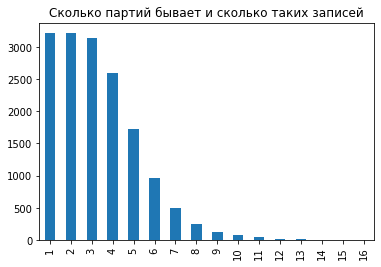

In [29]:
df_temp['party'].value_counts().plot(kind = 'bar', title = 'Сколько партий бывает и сколько таких записей')

Понятно. До 16-ти партий. 

**Транспонируем таблицу**

In [30]:
df_temp_pivot = df_temp.pivot_table(index='key', columns='party', values='temp')
# посмотрим что получилось
df_temp_pivot.head(2)

party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
key,,,,,,,,,,,,,,,,
1,1571.0,1604.0,1618.0,1601.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1581.0,1577.0,1589.0,1604.0,1608.0,1602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Выясним есть ли пропуск в первой парти
print('Количество записей с пропуском в первой партии:', len(df_temp_pivot[df_temp_pivot[1].isna()]))

Количество записей с пропуском в первой партии: 0


**Посчитаем число партий**

In [32]:
df_temp_pivot['last_notnan_column'] = df_temp_pivot.count(axis=1) # 

# сразу же удалим строки, где только одна партия, т.е. 

In [33]:
df_temp_pivot.head(2)

party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,last_notnan_column
key,,,,,,,,,,,,,,,,,
1,1571.0,1604.0,1618.0,1601.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1581.0,1577.0,1589.0,1604.0,1608.0,1602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


**Вынесем последнее измерение в отдельный столбец**

In [34]:
def get_last_party_value(row):
    """
    Функция фозвращает значение из столбца с номером, указанным в столбце last_notnan_column
    """
    last_party_column_index = int(row['last_notnan_column'])
    last_party_value = row[last_party_column_index] # это не индекс, это название столбца
    return  last_party_value 
df_temp_pivot['last_party_value'] = df_temp_pivot.apply(get_last_party_value, axis=1)
# посмотрим что получилось
df_temp_pivot.head(2)

party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,last_notnan_column,last_party_value
key,,,,,,,,,,,,,,,,,,
1,1571.0,1604.0,1618.0,1601.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1613.0
2,1581.0,1577.0,1589.0,1604.0,1608.0,1602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1602.0


**Исключим записи с одной партией и где значения первое и последнее значения совпадают**

In [35]:
# уберем записи где первое и последнее значения совпадают. соответственно попутно исключим записи, где только одна партия (т.к. автоматом первое будет равно последнему)
df_temp_pivot_droped = df_temp_pivot[(df_temp_pivot[1]!=df_temp_pivot['last_party_value'])]
# посмотрим что получилось
df_temp_pivot_droped.head(2)

party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,last_notnan_column,last_party_value
key,,,,,,,,,,,,,,,,,,
1,1571.0,1604.0,1618.0,1601.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1613.0
2,1581.0,1577.0,1589.0,1604.0,1608.0,1602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1602.0


**Почистим датафрейм и оставим только два столбца с первым и послдним значением**

In [36]:
# создадим датфрейм с только двумя столбцами: первое и последнее значение температуры
df_temp_shot = df_temp_pivot_droped[[1,'last_party_value']].copy()
df_temp_shot.rename(columns= {1:'first_party_temp','last_party_value': 'last_party_temp'}, inplace=True)
# дропнем индекс
df_temp_shot = df_temp_shot.reset_index(drop = False).copy()
# уберем название индекса
df_temp_shot = df_temp_shot.rename_axis(None, axis=1)

In [37]:
# оценим результат
df_temp_shot.info()
print('====== '*5)
display(df_temp_shot.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               2433 non-null   int64  
 1   first_party_temp  2433 non-null   float64
 2   last_party_temp   2433 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 57.1 KB
====== ====== ====== ====== ====== 


,key,first_party_temp,last_party_temp
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0


## 3.5. Данные о проволочных материалах (объём)<a id="3.5."></a>

**Переименуем столбцы**

In [38]:
wire_old_col_list = ['Wire 1','Wire 2','Wire 3','Wire 4','Wire 5','Wire 6','Wire 7','Wire 8','Wire 9']
wire_new_col_list = ['wire_1','wire_2','wire_3','wire_4','wire_5','wire_6','wire_7','wire_8','wire_9']

column_renamer(df=df_wire, old_col_list=wire_old_col_list, new_col_list=wire_new_col_list)

список новых названий столбцов: ['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']


**Заполним пропуски нулями**

In [39]:
df_wire.fillna(value=0, inplace=True)

In [40]:
# оценим результат
df_wire.info()
print('====== '*5)
display(df_wire.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
====== ====== ====== ====== ====== 


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Анализ данных<a id="4."></a>

## 4.1. Данные об электродах<a id="4.1."></a>

In [41]:
df_arc.head()

,key,work
0,1,0.335501
1,2,0.203838
2,3,0.123218
3,4,0.186295
4,5,0.277082


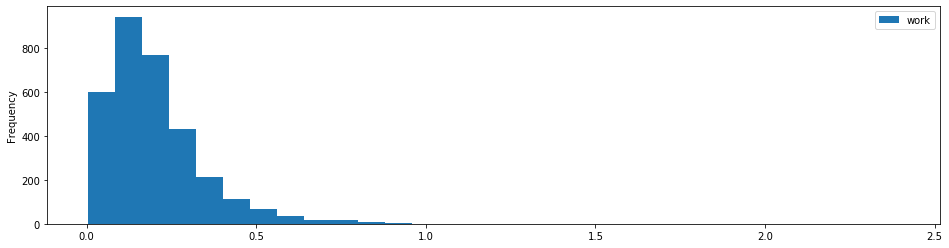

In [42]:
df_arc.plot(kind = 'hist', y = 'work', bins = 30, figsize = (16, 4))

Оценим выбросы

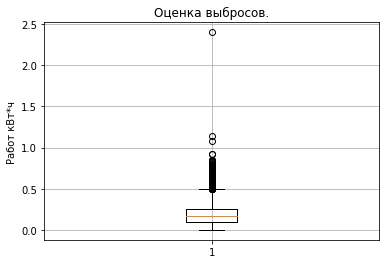

Выбросов произведенной работы: 130


In [43]:
boxplot = plt.boxplot(df_arc['work'].values)
plt.title('Оценка выбросов.')
plt.ylabel('Работ кВт*ч')
df_arc_outliers = list(boxplot["fliers"][0].get_data()[1])
plt.grid()
plt.show()
print("Выбросов произведенной работы:", len(df_arc_outliers)) 

**Выводы**

1. Числов обнаруженных выбросов менее 1% (на вскидку)
2. Большинство из них лежат в пределах 2-го значения верхней границы (граница выбросов в районе 0,5)
3. При этом "супервыбросов" как видно всего один.

**Резюме** - Выбросы пока оставляем. 

## 4.2. Данные о подаче сыпучих материалов (объем)<a id="4.2."></a>

**Посмотрим непосредственно на данные**

In [44]:
df_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


**Посмотрим на описание данных**

In [45]:
df_bulk.describe()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,1624.383509,3.160435,1.779163,47.240332,33.830617,2.633749,21.892298,2.441675,0.015660,0.463407,4.684564,4.345478,203.948226,1.041866,152.706616,115.319271
std,933.337642,11.869164,21.217878,74.239954,56.034505,20.918138,55.492582,31.944063,0.875978,6.154398,20.157323,22.699580,151.419639,14.114252,81.091421,84.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,816.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,104.000000,0.000000
50%,1622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,148.000000,106.000000
75%,2431.000000,0.000000,0.000000,80.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263.000000,0.000000,202.000000,204.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


**Посмотрим на распределение в виде boxplot-диаграмм**

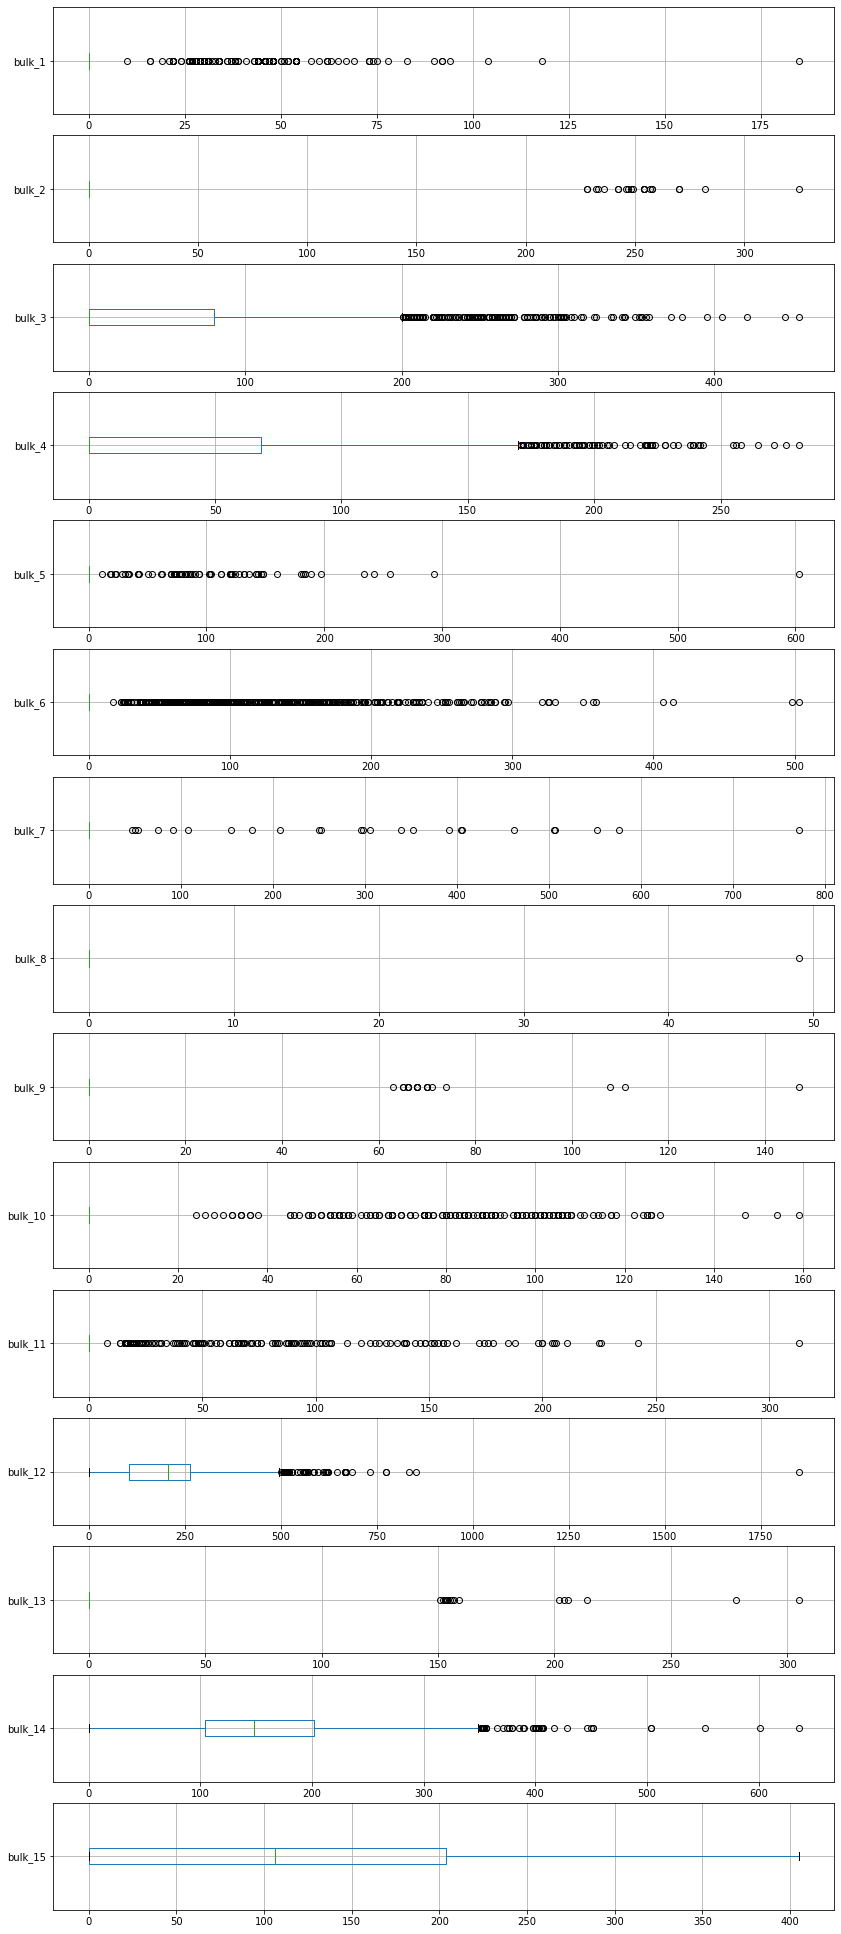

In [46]:
def boxplot_col_printer(df:pd.DataFrame, col_list:list):
    """
    Функция отображает горизонтальные графики типа boxplot
    """
    fig, axes = plt.subplots(nrows=len(col_list), ncols=1, figsize=(14,35)) # тут ок
    
    for i,  ax in zip(col_list, axes.ravel()): # тут ок
        col_number_index = col_list.index(i)
        df.boxplot(column=col_list[col_number_index], vert=False, ax=ax) # тут ок
    plt.show() # тут ок
    
bulk_number = df_bulk.columns.to_list()[1:] # сформируем список столбцов начиная от bulk_1
boxplot_col_printer(df=df_bulk, col_list=bulk_number)    

**Посмотрим на распределение в виде гистаграмм**

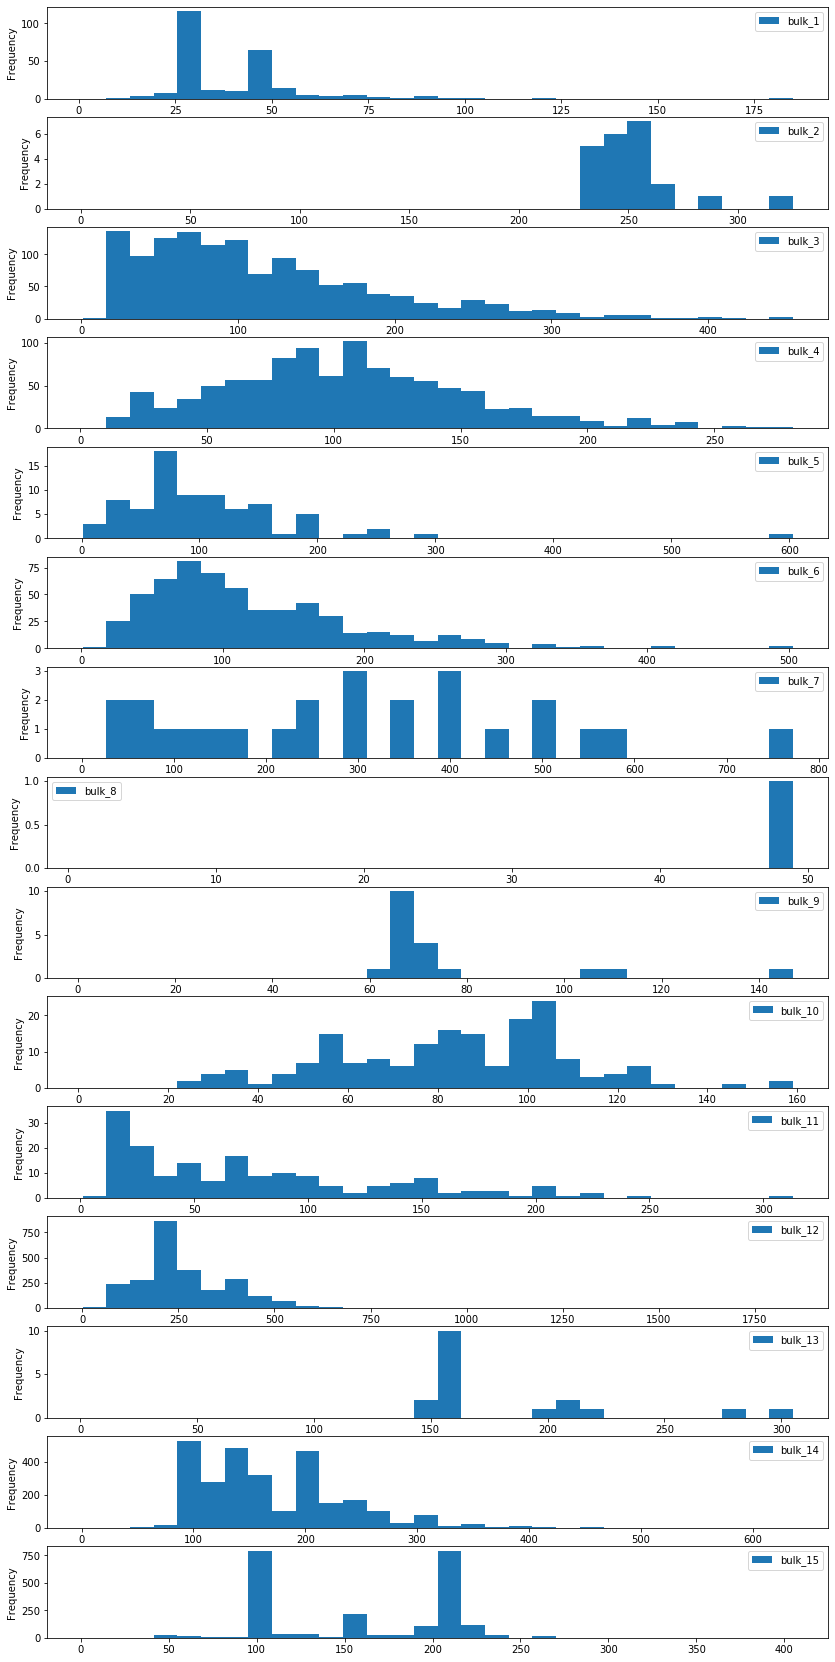

In [47]:
def hist_col_printer(df:pd.DataFrame, col_number:list):
    """
    Функция отображает горизонтальные гистораммы
    """
    fig, axes = plt.subplots(nrows=len(col_number), ncols=1, figsize=(14,30)) # тут ок
    
    for i,  ax in zip(col_number, axes.ravel()): # тут ок
        col_number_index = col_number.index(i)
        df.plot(kind='hist', y = col_number[col_number_index], ax=ax, bins = 30, range=(1,df[col_number[col_number_index]].max()))
        #df.boxplot(column=bulk_number[bulk_number_index], vert=False, ax=ax) # тут ок
    plt.show() # тут ок
    

hist_col_printer(df=df_bulk, col_number=bulk_number) 

**Выводы**

1. Распределение значений присыпок для каждого вида имеет свой вид. Некоторые (например bulk_4, bulk_6) тяготеют к нормальному распределению со скошенностью в право.
2. возможно имеет смысл убрать выбросы в bulk_3 и bulk_4, но пока оставим как есть

## 4.3. Данные о продувке сплава газом<a id="4.3."></a>

**Посмотрим непосредственно на данные**

In [48]:
df_gas.head()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


**Посмотрим на описание данных**

In [49]:
df_gas['gas'].describe()

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas, dtype: float64

**Посмотрим на распределение в виде boxplot-диаграмм**

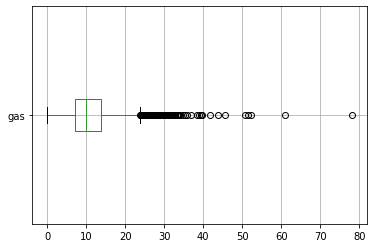

In [50]:
df_gas.boxplot(column='gas', vert = False)

**Посмотрим на распределение в виде гистаграмм**

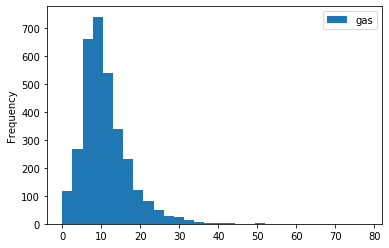

In [51]:
df_gas.plot(y = 'gas',  kind = 'hist', bins = 30)

**Выводы**

1. Распределение значений тяготеют к нормальному распределению со скошенностью в право.
2. Выбросы удалять не будем, возможно имеют значение

## 4.4. Результаты измерения температуры (целевой признак)<a id="4.4."></a>

**Посмотрим непосредственно на данные**

In [52]:
df_temp_shot.head()

,key,first_party_temp,last_party_temp
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0


**Посмотрим на описание данных**

In [53]:
df_temp_shot[['first_party_temp', 'last_party_temp']].describe()

,first_party_temp,last_party_temp
count,2433.000000,2433.000000
mean,1588.297164,1595.351007
std,29.405333,16.017495
min,1191.000000,1541.000000
25%,1571.000000,1587.000000
50%,1587.000000,1593.000000
75%,1605.000000,1599.000000
max,1679.000000,1700.000000


**Посмотрим на распределение в виде boxplot-диаграмм**

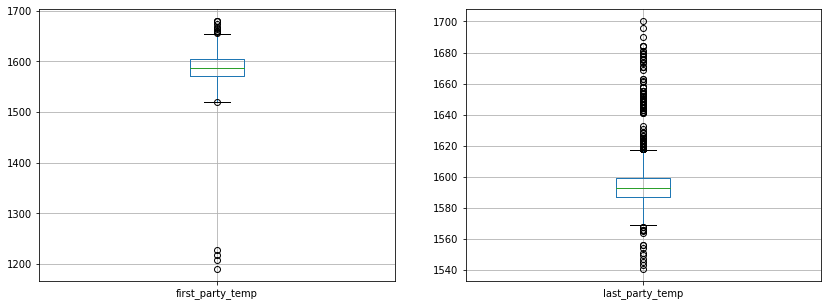

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) # тут ок

df_temp_shot.boxplot(column='first_party_temp', ax=axes[0])
df_temp_shot.boxplot(column='last_party_temp', ax=axes[1])
plt.show()

**Посмотрим на распределение в виде гистаграмм**

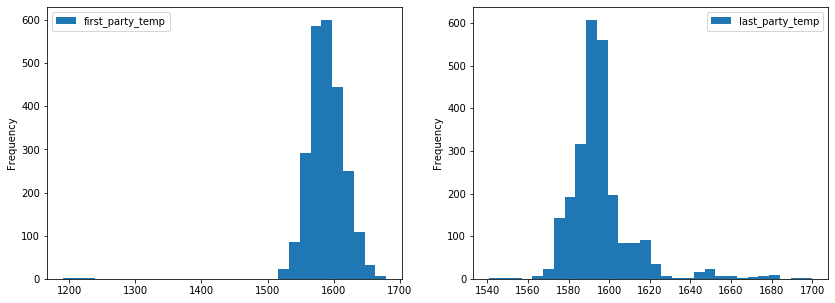

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) # тут ок

df_temp_shot.plot(y = 'first_party_temp',  kind = 'hist', bins = 30, ax = axes[0])
df_temp_shot.plot(y = 'last_party_temp',  kind = 'hist', bins = 30, ax = axes[1])
plt.show()

In [56]:
print('Корреляция значений параметров составляет', df_temp_shot['first_party_temp'].corr(df_temp_shot['last_party_temp']))

Корреляция значений параметров составляет 0.3715686150527717


**Выводы**

1. Судя по графикам видно что редко, но случается недогрев на первой партии, но на последней перегрев так же в зоне выбросов, но значительно чаще. Становится понятно почему появилась потребность в данной задаече.
2. Выбросы удалять не будем
3. Кореляции между значениями первым и последним замерами темпер

## 4.5. Данные о проволочных материалах (объём)<a id="4.5."></a>

**Посмотрим непосредственно на данные**

In [57]:
df_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Посмотрим на описание данных**

In [58]:
df_wire.describe()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,1623.426485,100.044411,17.712733,3.874524,0.261019,0.004911,1.137695,0.035842,0.330697,0.321492
std,932.996726,42.841120,33.517734,30.310417,4.293865,0.272615,8.958111,0.774190,4.392677,3.806904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,823.000000,70.281120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1619.000000,100.114563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2434.000000,125.798405,23.162880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132000,180.454575,32.847674,102.762401,90.053604


**Посмотрим на распределение в виде boxplot-диаграмм**

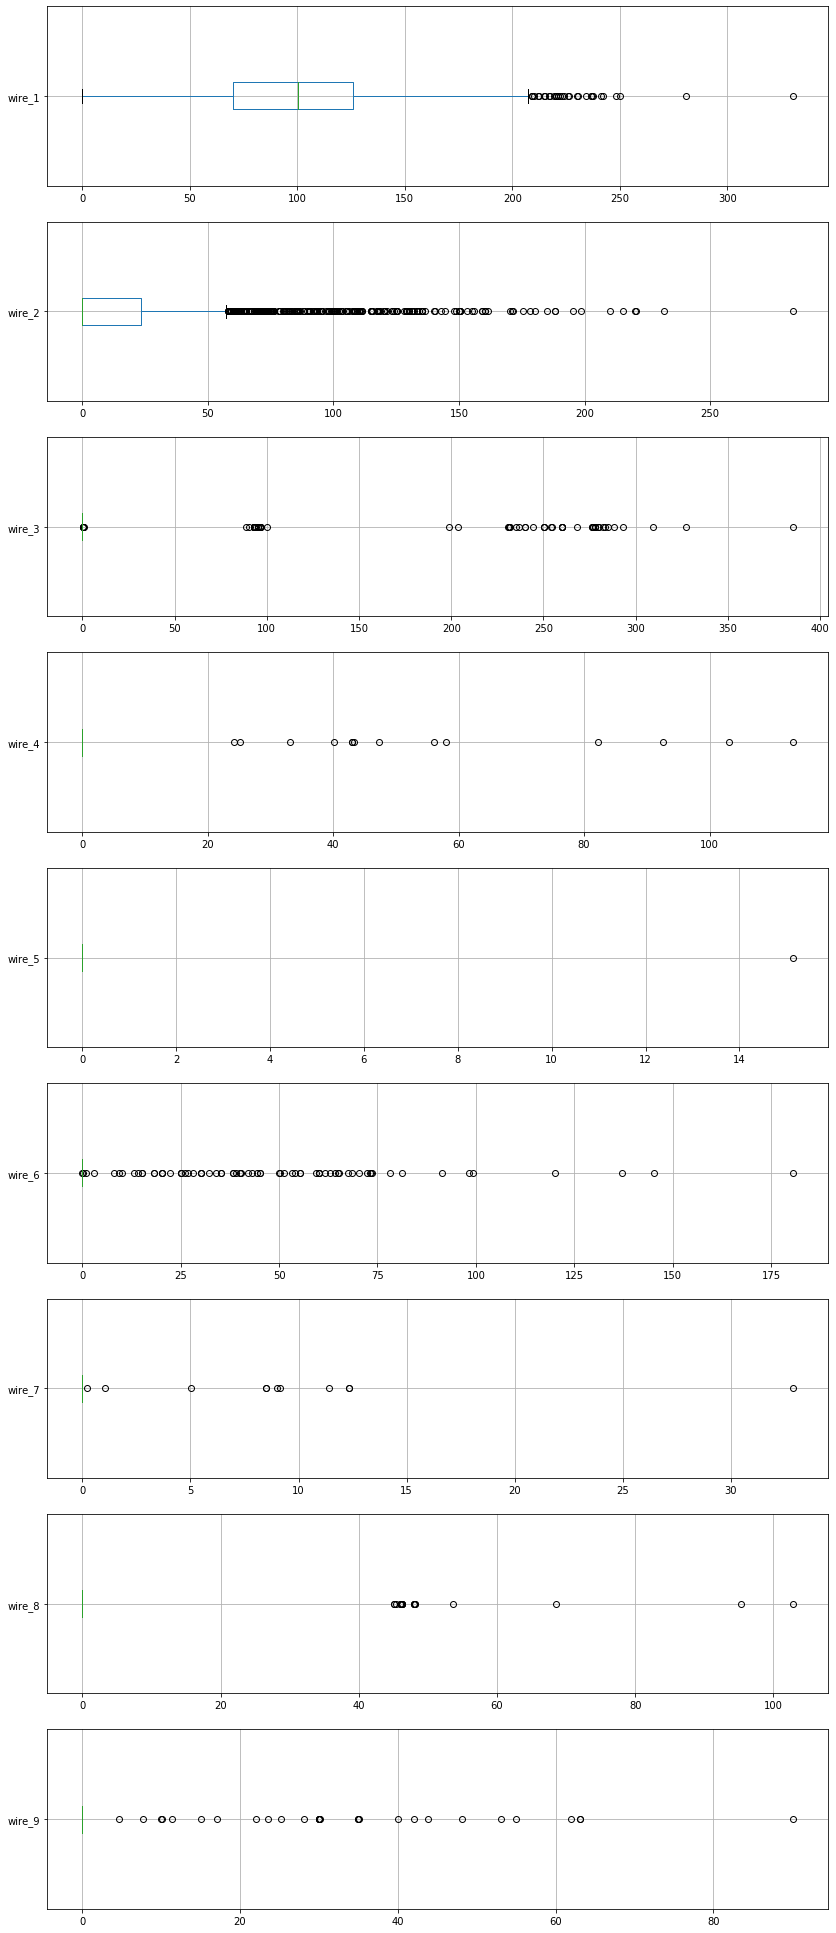

In [59]:
wire_col_list = df_wire.columns.to_list()[1:] # сформируем список столбцов начиная от bulk_1
boxplot_col_printer(df=df_wire, col_list=wire_col_list)     

**Посмотрим на распределение в виде гистаграмм**

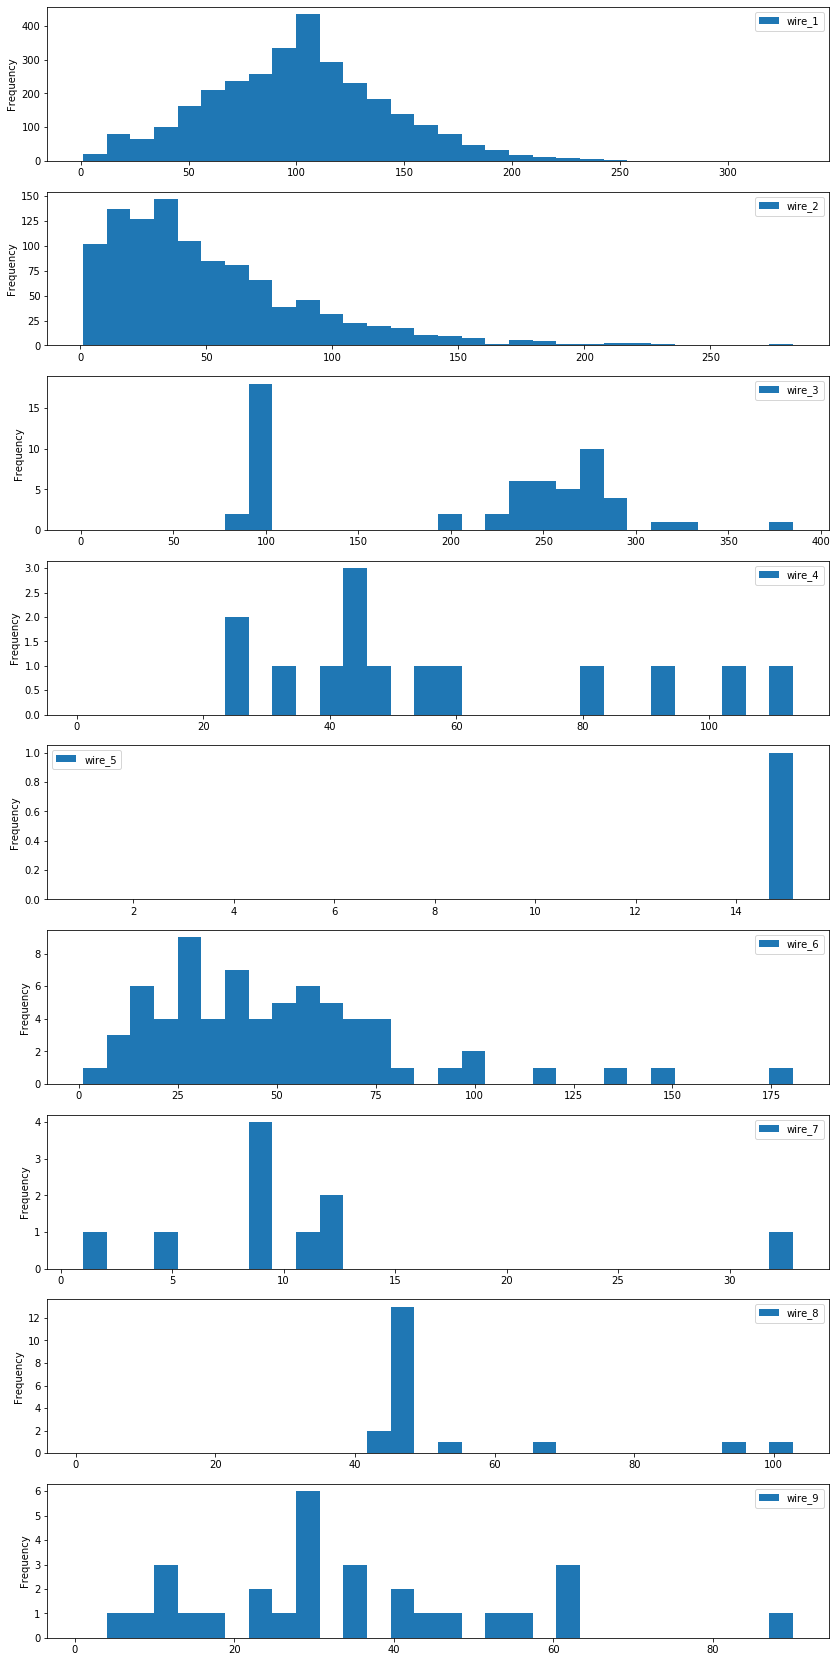

In [60]:
hist_col_printer(df=df_wire, col_number=wire_col_list) 

**Выводы**

1. Распределение значений присыпок для каждого вида имеет свой вид. пожалуй, только wire_1 тяготеют к нормальному распределению. Остальные значения очень ситуативно распределены.
2. Возможно имеет смысл убрать выбросы в wire_3 и wire_4, но пока оставим как есть

# 5. Подытог по проведенным работам<a id="5."></a>
- В разделе 1 приведено краткое описание технологического процесса, описание проекта, данных, решения и рекомендации озвученные на встрече в zoom 13.09.22 и т.п
- В разжеле 2 проведен первичный (предварительный) анализ данных и принтяы решения по дальнейшей предобработке
- В разделе 3 проведена предобработка данных в соответствии решениями, принятыми в п.2. Проделанные действия приведеный в чек-листе ниже.
- В разделе 4 проведен исследовательский анализ данных. Изучены распределения (рассмотрены графики типа "ящик с усами" и гистограммы), приведены статистические описния данных (функция describe) и сделаны выводы о необходиости дальнейших действий

## 5.1. Чек-лист по разделу 3<a id="5.1."></a>
**1. Данные об электродах**
- [x] Переименование столбцов
    - "Начало нагрева дугой" -> "arc_start_time"
    - "Конец нагрева дугой" -> "arc_end_time"
    - "Активаная мощность" -> "arc_active_power"
- [x]  Удалить столбец "Реактивная мощность", т.к. на нагрев она не влияет
- [x] Просуммировать мощность по каждой партии
- [x] Как вариант (опционально), можно создать новый столбец work = (end_time - start_time)\*vactive_power и просуммировать значения по ключу из данного столбца
- [x] Замены пропусков не требуется

**2. Данные о подаче сыпучих материалов (объем)**
- [x] Переименовать столбцы ("Bulk 1" -> "bulk_1" и т.д.)
- [x] Заполнить пропуски нулями. (если значение отсутствует, значит присадку не дабавляли, значит значение д.б. 0)

**3. Данные о продувке сплава газом**
- [x] Переименовать столбец ("Газ 1" -> "gas")
- [x] Суммирования значений по партии (ключу) не требуется
- [x] Замены пропусков не требуется

**4. Результаты измерения температуры (целевой признак)**
- [x] Поскольку в конечном итоге необходимо "развернуть" таблицу, так чтобы первое и последние значения температуры были в одной строке, преобразуем таблицу сразу и дальнейшие манипуляции со начениями будем проводить уже в таблице где для одной партии (ключа) только одна строка, а партии указаны в столбцах
- [x] Удалим записи с пропущенным значением в первой (при наличии)
- [x] Удалим записи с одинаковым значением для первой и последней партии
- [x] Удалим записи где только один раз встречается значение температуры
- [x] Удалим промежуточные записи между первой и последней партиями

## 5.2. Дальнейший план работ<a id="5.2."></a>

Следующим этапом работ необходимо выполнить следующие шаги:
- [x] Проверить на сультиколлинеарность
- [x] Объединить (inner join) предобработанные датасеты по столбцу key и проверить результат (оценить форму полученного датасета, список столбцов, удостовериться в отсутствии пропусков)
- [x] Разделить полученную выборку на train и test. Тестовая выборка д.б. 20% от изначальной.
- [x] Найти лучшие гиперпараметры для модейлей LinearRegression, RandomForesRegressor, LightGBM на тренировочной выборке при помощи [optuna](https://optuna.readthedocs.io/en/stable/reference/index.html) (аналог GridSearchCV и RandoSearchCV)
- [x] Найти наиболее значимые параметры
- [x] Спрогнозировать при помощи лучшей модели целевое значение на тестовой выборке и оценить результат.
- [x] Сделать выводы 

# 6. Подготовка и финальная проверка датасета<a id="6."></a>

# 6.1. Объединение датасетов<a id="6.1."></a>

In [61]:
df_merged = df_arc.merge(df_bulk, how = 'inner', on = 'key' )\
    .merge(df_gas, how='inner', on = 'key')\
    .merge(df_temp_shot, how='inner', on = 'key')\
    .merge(df_wire, how='inner', on = 'key')

In [62]:
collist1 = df_arc.columns.to_list()
collist2 = df_bulk.columns.to_list()[1:]
collist3 = df_gas.columns.to_list()[1:]
collist4 = df_temp_shot.columns.to_list()[1:]
collist5 = df_wire.columns.to_list()[1:]
totlal_col_list = collist1 + collist2 + collist3 + collist4 + collist5

print('Размер датасета после объединения:', df_merged.shape)
print('Список столбцов исходных датасетов идентичен списку результируещего датасета:', set(totlal_col_list)==set(df_merged.columns.to_list()))

Размер датасета после объединения: (2293, 29)
Список столбцов исходных датасетов идентичен списку результируещего датасета: True


In [63]:
df_merged.columns

Index(['key', 'work', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5',
       'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15', 'gas', 'first_party_temp',
       'last_party_temp', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5',
       'wire_6', 'wire_7', 'wire_8', 'wire_9'],
      dtype='object')

In [64]:
y = df_merged['last_party_temp']
X = df_merged.drop(columns=['last_party_temp', 'key'])
print('Размер целевого признака', y.shape)
print('Размер датасета без целевого призанка и номера партии', X.shape)

Размер целевого признака (2293,)
Размер датасета без целевого призанка и номера партии (2293, 27)


# 6.2. Проверка на мультиколлинеарность<a id="6.2."></a>

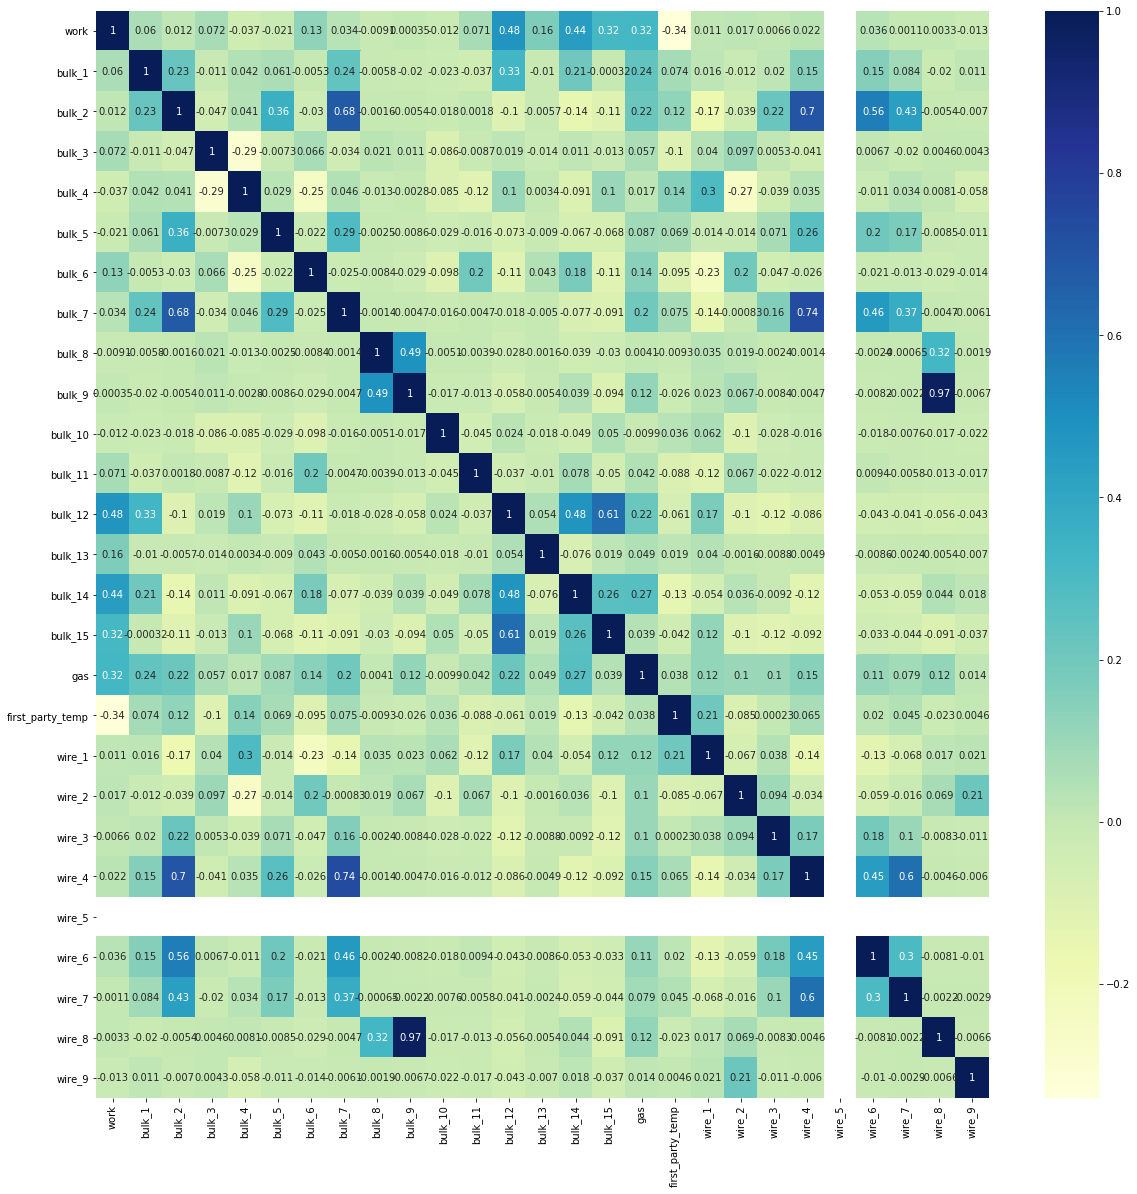

In [65]:
figure(figsize=(20, 20)) # dpi=200
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True )
plt.show()

Видно, что есть признаки с высокой сколлерированностью. Для некоторых линейных моделей это чувствительно, для некоторых - не собо. Н всякий случай дропнем bulk_2, bulk_7, bulk_9

In [66]:
X = X.drop(columns=['bulk_2','bulk_7','bulk_9'])

## 6.3. Разделение на тренировочную и тестовую выборку<a id="6.3."></a>

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12092022)

In [68]:
print(f'Размеры X_train = {X_train.shape}, y_train = {y_train.shape}, X_test = {X_test.shape},  y_test = {y_test.shape}')

Размеры X_train = (1834, 24), y_train = (1834,), X_test = (459, 24),  y_test = (459,)


# 7. Машинное обучение<a id="7."></a>

В рамках данного проекта воспользуемся альтернативным оптимизатором гиперпараметров Optuna. Optuna надходит лучшие гиеперпараметры модели за меньшее время, хотя и с чуть меньшим качеством по сравнению с randomSearch и gridsearch.

## 7.1. LightGBM<a id="7.1."></a>

In [69]:
lgb = LGBMRegressor()

# Зададим параметры для OPTUNA
param_distributions_lgb_optuna = {
    'n_estimators': optuna.distributions.IntUniformDistribution(900,1100,5), # 990 # .IntUniformDistribution(10,1000,10
    'max_depth': optuna.distributions.IntUniformDistribution(80,120,1), # 88 # .IntUniformDistribution(2,100,1)
    'learning_rate': optuna.distributions.LogUniformDistribution(0.001, 0.01) # 0.003 # .LogUniformDistribution(0.0001, 0.1)
    }

opt_search_lightgbm = optuna.integration.OptunaSearchCV(lgb, param_distributions_lgb_optuna, cv=10 , n_trials=100, scoring='neg_mean_absolute_error', timeout=60, random_state=12092022)

opt_search_lightgbm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  # Remove the CWD from sys.path while we load stuff.
[I 2022-09-24 18:16:18,561] A new study created in memory with name: no-name-14427d2f-1a4d-427a-a9d1-996663e278b4
[I 2022-09-24 18:17:02,468] Trial 0 finished with value: -6.030458877727829 and parameters: {'n_estimators': 1090, 'max_depth': 98, 'learning_rate': 0.004013988038408687}. Best is trial 0 with value: -6.030458877727829.
[I 2022-09-24 18:17:43,794] Trial 1 finished with value: -6.160452245827375 and parameters: {'n_estimators': 920, 'max_depth': 94, 'learning_rate': 0.0020536422565676977}. Best is trial 0 with value: -6.030458877727829.


OptunaSearchCV(cv=10, enable_pruning=False, error_score=nan,
               estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                       colsample_bytree=1.0,
                                       importance_type='split',
                                       learning_rate=0.1, max_depth=-1,
                                       min_child_samples=20,
                                       min_child_weight=0.001,
                                       min_split_gain=0.0, n_estimators=100,
                                       n_jobs=-1, num_leaves=31, objective=None,
                                       random_state=None, reg_alpha=0.0,
                                       re...
               max_iter=1000, n_jobs=1, n_trials=100,
               param_distributions={'learning_rate': LogUniformDistribution(high=0.01, low=0.001),
                                    'max_depth': IntUniformDistribution(high=120, low=80, step=1),
          

In [70]:
print('Лучшее значение метрики для LightGBM:', abs(opt_search_lightgbm.best_score_))

Лучшее значение метрики для LightGBM: 6.030458877727829


Добавим в табличку, чтоб потом сравнить

In [71]:
best_model = pd.DataFrame(index = ['LightGBM', 'RandomForest', 'ElasticNet'])
best_model.at['LightGBM','score'] = abs(opt_search_lightgbm.best_score_)

## 7.2. RandomForest<a id="7.2."></a>

In [72]:
random_forest_model = RandomForestRegressor()

# здесь закоментированы параметры при которых поиск лучшей модели дал лучше результат, просто на всякий случай
'''
param_distributions_randomforest_optuna = {
    'n_estimators': optuna.distributions.IntUniformDistribution(10,1000,10),
    'max_depth': optuna.distributions.IntUniformDistribution(2,40,1),
    'min_samples_split': optuna.distributions.IntUniformDistribution(20,60,5),
    'min_samples_leaf': optuna.distributions.IntUniformDistribution(1, 201, 10),
    'max_features': optuna.distributions.CategoricalDistribution(['sqrt','log2']),
    'bootstrap' : optuna.distributions.CategoricalDistribution([True, False])}
'''
param_distributions_randomforest_optuna = {
    'n_estimators': optuna.distributions.IntUniformDistribution(600,800,5),
    'max_depth': optuna.distributions.IntUniformDistribution(30,80,2),
    'min_samples_split': optuna.distributions.IntUniformDistribution(5,30,5),
    'min_samples_leaf': optuna.distributions.IntUniformDistribution(1, 100, 5),
    'max_features': optuna.distributions.CategoricalDistribution(['sqrt','log2']),
    'bootstrap' : optuna.distributions.CategoricalDistribution([True, False])}

opt_search_forest = optuna.integration.OptunaSearchCV(random_forest_model, param_distributions_randomforest_optuna, cv=10 , n_trials=100, scoring='neg_mean_absolute_error', timeout=300, random_state=12092022)
opt_search_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\optuna\distributions.py:563: UserWarning: The distribution is specified by [1, 100] and step=5, but the range is not divisible by `step`. It will be replaced by [1, 96].
  low=low, old_high=old_high, high=high, step=step
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2022-09-24 18:17:48,221] A new study created in memory with name: no-name-58056601-c3cb-4e69-a63a-a41c597065e0
[I 2022-09-24 18:18:14,910] Trial 0 finished with value: -6.663680616279713 and parameters: {'n_estimators': 790, 'max_depth': 52, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: -6.663680616279713.
[I 2022-09-24 18:18:31,293] Trial 1 finished with value: -7.093825589681418 and parameters: {'n_estimators': 735, 'max_depth': 78, 'min_samples_split': 10, 'min_sa

OptunaSearchCV(cv=10, enable_pruning=False, error_score=nan,
               estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                               criterion='mse', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=N...
                                    'max_features': CategoricalDistribution(choices=('sqrt', 'log2')),
                                    'min_s

In [73]:
print('Лучшее значение метрики для Случайного леса:', abs(opt_search_forest.best_score_))

Лучшее значение метрики для Случайного леса: 6.27460616912987


In [74]:
# так же добавим в табличку лучший результат
best_model.at['RandomForest','score'] = abs(opt_search_forest.best_score_)

### 7.2.1. Важность параметров<a id="7.2.1."></a>

Есть несколько вариантов поиска наиболее значимых параметров. В данном члучае воспользуемся возможностью sklearn предоставленной для модели "Случайный лес".  Для это, определим лучшие парметры найденные через Optuna и передадим их в randomforest. После обучения randomforest определим наиболее значимые параметры.

In [75]:
print(opt_search_forest.best_params_)

{'n_estimators': 730, 'max_depth': 80, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}


In [76]:
opt_search_forest.best_params_['n_estimators']

730

In [77]:
random_forest_model_2 = RandomForestRegressor(n_estimators = opt_search_forest.best_params_['n_estimators'],
                                            max_depth = opt_search_forest.best_params_['max_depth'],
                                            min_samples_split = opt_search_forest.best_params_['min_samples_split'],
                                            min_samples_leaf = opt_search_forest.best_params_['min_samples_leaf'],
                                            max_features = opt_search_forest.best_params_['max_features'],
                                            bootstrap = opt_search_forest.best_params_['bootstrap']
                                           )

In [78]:
random_forest_model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=730, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

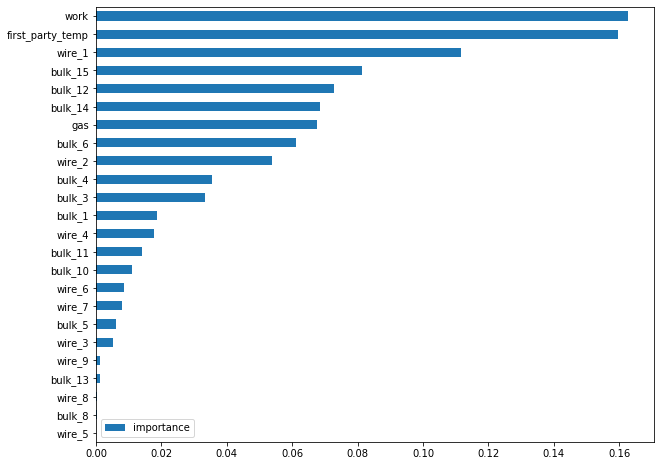

In [79]:
feature_importance = pd.DataFrame(data = {'importance': random_forest_model_2.feature_importances_}, index = X_train.columns  ).sort_values(by='importance', ascending=True)
feature_importance.plot(y='importance', kind='barh', figsize = (10,8))

## 7.2. ElasticNet<a id="7.2."></a>

In [80]:
# не забываем про стандаритизацию!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
elastic_net = ElasticNet()

# Зададим параметры для OPTUNA
param_distributions_elastic_net_optuna = {
    'l1_ratio': optuna.distributions.UniformDistribution(0.1, 1),
    'alpha': optuna.distributions.LogUniformDistribution(0.01, 1) 
    }

opt_search_elastic_net = optuna.integration.OptunaSearchCV(elastic_net, param_distributions_elastic_net_optuna, cv=10 , n_trials=100, scoring='neg_mean_absolute_error', timeout=60, random_state=12092022)

opt_search_elastic_net.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  if __name__ == '__main__':
[I 2022-09-24 18:23:09,602] A new study created in memory with name: no-name-77f19630-2fab-41fe-878c-dbfed83e8cd1
[I 2022-09-24 18:23:09,679] Trial 0 finished with value: -6.599687379665966 and parameters: {'l1_ratio': 0.9549111928788645, 'alpha': 0.0833442517769575}. Best is trial 0 with value: -6.599687379665966.
[I 2022-09-24 18:23:09,751] Trial 1 finished with value: -6.629953308248533 and parameters: {'l1_ratio': 0.643218466569315, 'alpha': 0.017136181876807103}. Best is trial 0 with value: -6.599687379665966.
[I 2022-09-24 18:23:09,796] Trial 2 finished with value: -6.601624073508704 and parameters: {'l1_ratio': 0.4107428932786371, 'alpha': 0.04217446517960462}. Best is trial 0 with value: -6.599687379665966.
[I 2022-09-24 18:23:09,838] Trial 3 finished with value: -6.

OptunaSearchCV(cv=10, enable_pruning=False, error_score=nan,
               estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                    l1_ratio=0.5, max_iter=1000,
                                    normalize=False, positive=False,
                                    precompute=False, random_state=None,
                                    selection='cyclic', tol=0.0001,
                                    warm_start=False),
               max_iter=1000, n_jobs=1, n_trials=100,
               param_distributions={'alpha': LogUniformDistribution(high=1.0, low=0.01),
                                    'l1_ratio': UniformDistribution(high=1.0, low=0.1)},
               random_state=12092022, refit=True, return_train_score=False,
               scoring='neg_mean_absolute_error', study=None, subsample=1.0,
               timeout=60, verbose=0)

In [82]:
# так же добавим в табличку лучший результат
best_model.at['ElasticNet','score'] = abs(opt_search_elastic_net.best_score_)

# 8. Итоговый результат и выводы<a id="8."></a>

# 8.1. Итоговый рейтинг<a id="8.1."></a>

Сравним результаты.

In [83]:
# если дропнуть bulk_2, bulk_7, bulk_9
best_model.sort_values('score')

,score
LightGBM,6.030459
RandomForest,6.274606
ElasticNet,6.539596


Как видно лидирует модель LightGBM. Отлично. Посмотрим что она покажет на отложенной тестовой выборке.

In [84]:
opt_search_lightgbm_prediction = opt_search_lightgbm.best_estimator_.predict(X_test)
opt_search_lightgbm_prediction_score = mean_absolute_error(y_test, opt_search_lightgbm_prediction)
print('MAE для LightGBM =', opt_search_lightgbm_prediction_score)

MAE для LightGBM = 6.606191093771819


Кхм, результат похуже, но в целом в необхоимый диапазон укаладывается.

Но, заглянем в дргуни модели. интересно же..

In [85]:
opt_search_forest_prediction = opt_search_forest.best_estimator_.predict(X_test)
opt_search_forest_prediction_score = mean_absolute_error(y_test, opt_search_forest_prediction)
print('MAE для RandomForest = ', opt_search_forest_prediction_score)

MAE для RandomForest =  6.762555336695836


In [86]:
opt_search_elastic_net_prediction = opt_search_elastic_net.best_estimator_.predict(X_test_scaled)
opt_search_elastic_net_prediction_score = mean_absolute_error(y_test, opt_search_elastic_net_prediction)
print('MAE для ElasticNet = ', opt_search_elastic_net_prediction_score)

MAE для ElasticNet =  6.742262669006228


"Штош", рейтинг моделей на тестовой выборке остался тем же, а ElasticNet все еще попадает в необходимый диапазон. Но тут важно отметить, что если дать Optun-е больше времни на поиск гиперпараметров, то результат можно еще улчшить. Но в целях экономии времени на прогон кода при проверке задания было принято решение пожертвовать качеством в пользу времени. Такое бывает, крутая но бесконечно-долгая модель думаю интересна только возможно в научных целях. 


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Николй, спасибо за подробные комментарии. Очень много действительно дельных идей, к размышлению над которыми вернусь когда все сдам). Отчет приведен после выводов. 
</div>

# 8.2. Выводы<a id="8.2."></a>

В рамках настоящего проекта 

**Проделана следующая работа**:
1. Проведена очистка данных
2. Проведен предварительный анализ данных на аномалии, пропуски, выбросы
3. Исходные данные при необходимости сгруппированы по партиям и объединены в единую таблицу с общим набором признаков
4. Проведена проверка на мультиколлинеарность
5. На тренироваочной выборке обучено три модели и выбрана лучшая
6. На тестовой выборке сделан прогноз при помощи лучшей модели. Необхоимый по условиям задания порог достигнут.
7. Опциональным шагом на стестовой выборке так же сдлан прогноз с использованием других моделей
8. Определены наиболее значимые признаки

**Сделаны следующие выводы**
1. Модель на базе градиентного бустинга дала лучшие результаты. MAE на тестовой выборке составила 6.60
2. К наиболее значимым признакам датасета можно отнести:
    1. энергетические параметры, что логично, т.к. при помощи электрической мощности производится нагрев
    2. первичную температуру, что в целом выглядит странно, т.к. в предварительной оценке скоррлированности данных парамтров значение было не высоким (0.37)
    3. проволочные материалы wire_1
    4. присадки 12,14,15 (что вероятно можно объяснить особенностями протекния химической реакции, но за неимением названий присадок что-то говорить наверняка сложно)
    5. газ
3. Ряд признаков скоррелирован друг сдругом, что вероятно смогли бы объяснить технологи. Здесь надо отмтетиь что в данной верисии проекта остался вариант с удаленными высокскоррелированными признаками, но для градиантного бустинга это никак не повлияло на результат, для линейной модели немного улучшило, что с одной стороны логично (т.к. линейные модели чувствительны к скоррелированности), с другой Elastic_Net это позволяет обходить, но, видимо, на эксперимент надо было потратить больше времени), а вот для Случайного леса даже ухудшило. Общий вывод по данному пункту - все ситуативно.
4. Optuna при ограниченных временных ресурсах дает вполне приличные результаты. При этом, стоит отметить, что если дать время на обучение градиентного бустинга порядка 10 минут и раскомментировать параметры, результат будет на несколько десятых лучше. Но с учетом того что необходимсый порог достигнут, приоритет отдан в пользу быстродействия.

----
----
----

# Отчет

# 1. Введение
Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. В рамках проекта необходимо построить модель, которая предскажет температуру стали и определить наиболее влияющие на температуру параметры. 

# 2. Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).


# 3. Цели и задачи проекта
Обеспечение возможности прогнозирования температуры плавления позволит бизнесу иметь возможность управлять процессом выплавки стали, что обеспечит:
1. Экономию на энергоресурсах и затрачиваемых материалах
2. Понизить амортизацию ковша (и возможно, другого оборудования), что позволит 
	1. уменьшить количество ремонтных работ за период времени (экономия на ремонте)
	2. снизить время простоя ковша (уменьшение упущенной выгоды)
	 
# 4. Описание решения (что было сделано)

В рамках настоящего проекта Проделана следующая работа:
1. Проведена очистка данных
2. Проведен предварительный анализ данных на аномалии, пропуски, выбросы
3. Исходные данные при необходимости сгруппированы по партиям и объединены в единую таблицу с общим набором признаков
4. Проведена проверка на мультиколлинеарность
5. На тренировочной выборке обучено три модели и выбрана лучшая
6. На тестовой выборке сделан прогноз при помощи лучшей модели. Необходимый по условиям задания порог достигнут.
7. Опциональным шагом на тестовой выборке так же сделан прогноз с использованием других моделей
8. Определены наиболее значимые признаки


# 5. Результат решения (модель, параметры, метрика) 
## 5.1. Результат
Результатом решения поставленной задачи является модель основанная на принципе градиентного бустинга (LightGBM), с  гиперпараметрами, подобранными при помощи фреймворка Optuna. 

## 5.2. Параметры модели
Наилучшими параметрами оказались:
```json
{
  'n_estimators': 1090, 
  'max_depth': 98, 
  'learning_rate': 0.004013988038408687
}
```

## 5.3. Метрика
В качестве метрики модели использовалось среднее абсолютная ошибка Mean Absolute Error 
$$
MAE = \frac{1}{N}\sum_{i=1}^n|y_i-\hat{y_i}|
$$
Основное достоинство данной метрики в ее "читаемости". Она интуитивно понятна любому человеку - насколько в данному случае градусов в среднем ошибается модель с прогнозом. Зная необходимое значение температуры данная метрика является, пожалуй наиболее удобной.

# 6. Параметры датасета, важность признаков.
## 6.1. Исходные данные
В качестве исходных данных были предоставлены следующие данные:
- data_arc.csv — данные об электродах;
- data_bulk.csv — данные о подаче сыпучих материалов (объём); 
- data_bulk_time.csv — данные о подаче сыпучих материалов (время); 
- data_gas.csv — данные о продувке сплава газом;
- data_temp.csv — результаты измерения температуры;
- data_wire.csv — данные о проволочных материалах (объём);
- data_wire_time.csv — данные о проволочных материалах (время).

## 6.2. Предподготовка данных
По каждому из исходных файлов были проведены следующие действия (чекбоксы можно считать заполненными):

### 6.2.1. Данные об электродах (data_arc.csv)
- [ ] Переименование столбцов
    - "Начало нагрева дугой" -> "arc_start_time"
    - "Конец нагрева дугой" -> "arc_end_time"
    - "Активаная мощность" -> "arc_active_power"
- [ ]  Удалить столбец "Реактивная мощность", т.к. на нагрев она не влияет
- [ ] Просуммировать мощность по каждой партии
- [ ] Как вариант (опционально), можно создать новый столбец work = (end_time - start_time)\*vactive_power и просуммировать значения по ключу из данного столбца
- [ ] Замены пропусков не требуется

### 6.2.2. Данные о подаче сыпучих материалов (объем) (data_bulk.csv) 
- [ ] Переименовать столбцы ("Bulk 1" -> "bulk_1" и т.д.)
- [ ] Заполнить пропуски нулями. (если значение отсутствует, значит присадку не дабавляли, значит значение д.б. 0)

### 6.2.3. Данные о продувке сплава газом (data_gas.csv)
- [ ] Переименовать столбец ("Газ 1" -> "gas")
- [ ] Суммирования значений по партии (ключу) не требуется
- [ ] Замены пропусков не требуется

### 6.2.4. Результаты измерения температуры (целевой признак) (data_temp.csv)
- [ ] Поскольку в конечном итоге необходимо "развернуть" таблицу, так чтобы первое и последние значения температуры были в одной строке, преобразуем таблицу сразу и дальнейшие манипуляции со начениями будем проводить уже в таблице где для одной партии (ключа) только одна строка, а партии указаны в столбцах
- [ ] Удалим записи с пропущенным значением в первой (при наличии)
- [ ] Удалим записи с одинаковым значением для первой и последней партии
- [ ] Удалим записи где только один раз встречается значение температуры
- [ ] Удалим промежуточные записи между первой и последней партиями

### 6.2.5.Данные о проволочных материалах (объём) (data_wire.csv)
- [ ] Переименовать столбцы "Wire 1"-> "wire_1"  и т.д.
- [ ] Заполнить пропуски нулями.


## 6.3. Важность признаков. Параметры подготовленного датасета
Для получения датасета, предназначенного для обучения модели после предобработки данны, проведенных на предыдущем шаге все датасеты были объединены в один и получен  список признаков приведенный на рис. 1. 

На данном рисунке приведены параметры датасета, отсортированные в порядке значимости при обучении модели типа "Случайный лес".

Рис.1 Список признаков, проранжированный в порядке важности при обучении модели.
![[Pasted image 20220924220209.png]]


# 7. Основные выводы
Основные факторы, влияющие на температуру это первоначальная температура и энергетические характеристики (электрическая мощность). Управляя ими можно в значительной степени управлять энергоэффективностью сталелитейного производства.

# 8. Заключение
- **Какие пункты плана были выполнены, а какие — нет (поясните почему)?**
В рамках данного отчета были даны ответы на следующие вопросы были выполнены все пункты изначально намеченного плана. К нюансам реализации можно отнести предобработку датсета data_temp.csv, т.к. в процессе было принято решение о изменении порядка операций: сперва перевод в "горизонтальный" вид, затем уже работа в пределах строк. В качестве альтернативного подхода, можно было бы применить оконные функции (если через SQL) или rolling если оставаться в рамках Panads

-  **Какие трудности возникли и как вы их преодолели?**
Особых трудностей в процессе не было. Задача в целом типовая, но достаточно объемная. Просто пришлось достаточно много "повозиться"

- **Какие ключевые шаги в решении задачи выделили?**
Сточки зрения выполненных работ к ключевым шагам можно отнести очистку и объединение данных, в первую очередь (анализ не включаю, т.к. принципиально ничего значимого он не дал, разве что понимание и уверенность что с ними все ок). Обучение модели, тестирование и выводы так же можно считать ключевыми шагами в работе.
С точки зрения бизнеса самым важным является перечень наиболее значимых параметров. Это то, на что влияя бизнес может снижать свои расходы и издержки.

- **Какая ваша итоговая модель и какое у неё качество?**
Итоговая модель - LightGBM с метрикой качества MAE = 6.6. Более подробно см. п.5